Now that the dataset has been preprocessed, we can turn our attention to EDA.

In [1]:
import pandas as pd
reviews = pd.read_parquet("reviews2.parquet")  # cleaned version
business = pd.read_parquet("business.parquet")  # changed cleaner version to parquet in earlier file.
users = pd.read_parquet("users2.parquet")  # unchanged.

Since reviews are the center of our project, we first get a sense of what reviews look like.

In [3]:
reviews['review_length'] = reviews['text'].str.len()  # how many characters does the review have?
print(round(reviews['review_length'].describe(),-2))  

count    6989600.0
mean         600.0
std          500.0
min            0.0
25%          200.0
50%          400.0
75%          700.0
max         5000.0
Name: review_length, dtype: float64


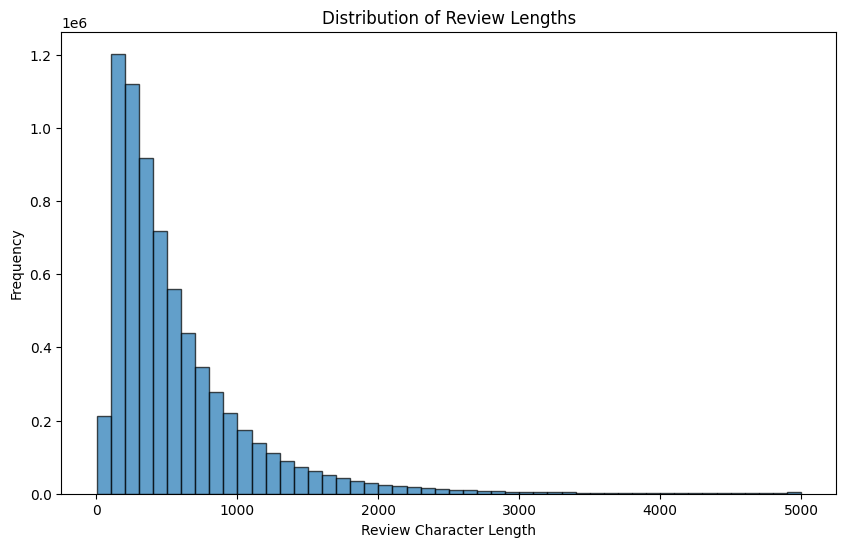

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(reviews['review_length'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Character Length') 
plt.ylabel('Frequency')
plt.show()

The typical review is about 500 characters, or around 100 words. That said, reviews somewhat longer than the mean are not uncommon. Reviews greater than 2,000 characters in length (~400 words) are the most rare. Does review length have any connection to star rating?

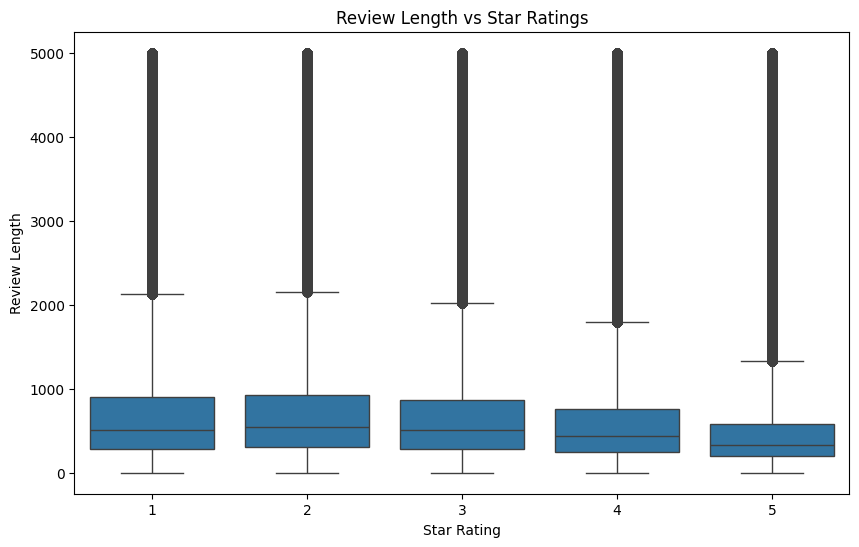

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='review_length', data=reviews, whis = 2)
plt.title('Review Length vs Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()

While all star ratings have chatty outliers, the higher star ratings tend to have slightly shorter reviews. We now look at reviews from a user level.

In [14]:
top_users = users.sort_values('review_count', ascending=False).head(10)
print(f'The average user has ~{round(users["review_count"].mean(),2)} reviews.') # see AI appendix for changing numbers from scientific notation.
print("Top 10 Users by Review Count:")
print(top_users[['user_id', 'name', 'review_count', 'average_stars']])


The average user has ~23.39 reviews.
Top 10 Users by Review Count:
                       user_id      name  review_count  average_stars
17169   Hi10sGSZNxQH3NLyWSZ1oA       Fox         17473           3.77
795339  8k3aO-mPeyhbR5HUucA5aA    Victor         16978           3.35
4723    hWDybu_KvYLSdEFzGrniTw     Bruce         16567           3.67
606393  RtGqdDBvvBCjcu5dUqwfzA     Shila         12868           3.87
152     P5bUL3Engv-2z6kKohB6qQ       Kim          9941           3.81
3977    nmdkHL2JKFx55T3nq5VziA    Nijole          8363           3.75
17727   bQCHF5rn5lMI9c5kEwCaNA   Vincent          8354           3.87
7394    8RcEwGrFIgkt9WQ35E6SnQ    George          7738           3.49
10873   Xwnf20FKuikiHcSpcEbpKQ   Kenneth          6766           3.32
1229    CxDOIDnH8gp9KXzpBHJYXw  Jennifer          6679           3.34


The most prolific users have reviews in the 10,000s, while the average user has about ~23 reviews. What is the distribution of average star rating amongst users?

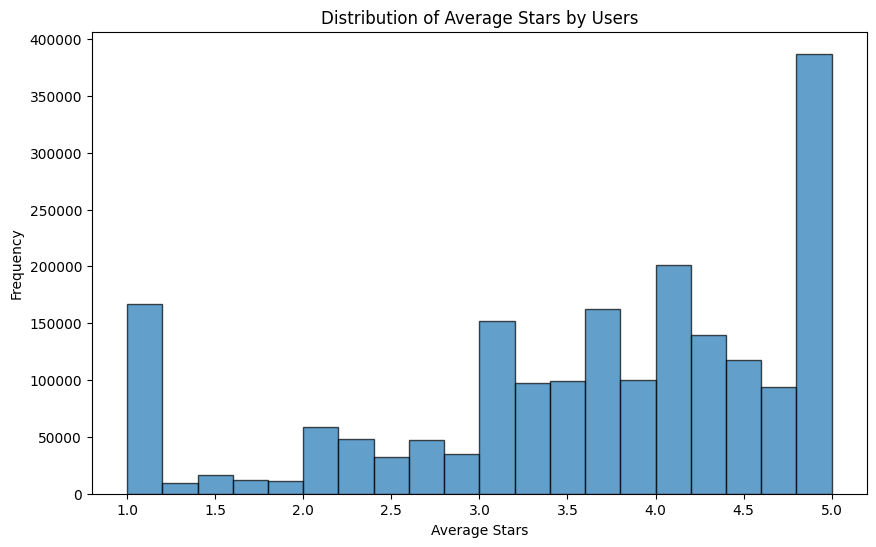

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(users['average_stars'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Stars by Users')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.show()

Most users have a high average star rating, with some users exclusively rating extremely low. How do reviews look from a business perspective?

The average business has ~44.89 reviews.


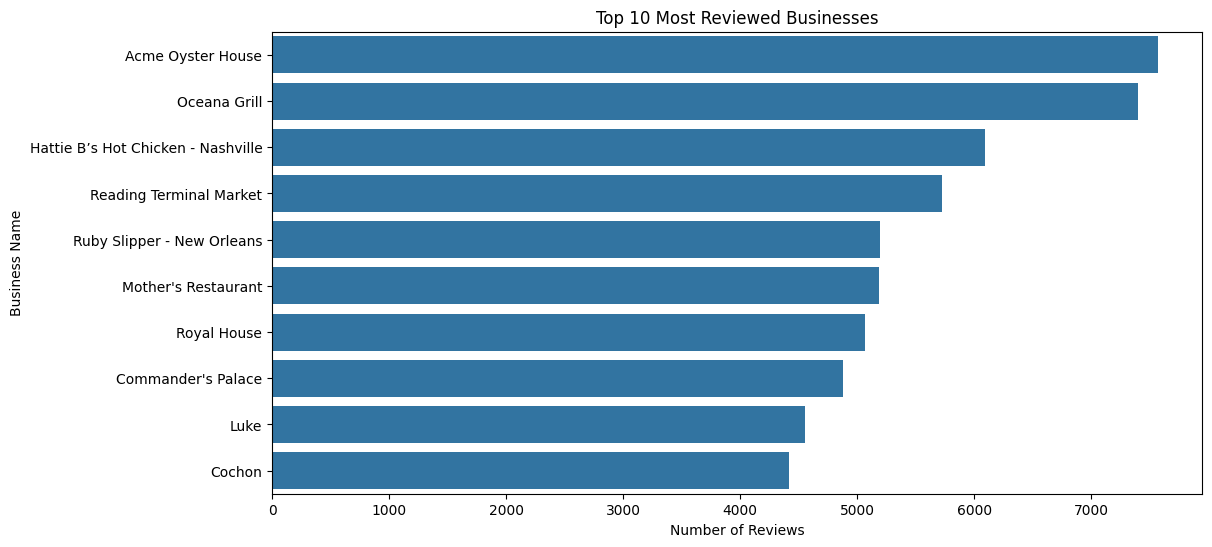

In [15]:
print(f'The average business has ~{round(business["review_count"].mean(),2)} reviews.')
top_businesses = business.sort_values(by='review_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='review_count', y='name', data=top_businesses)
plt.title('Top 10 Most Reviewed Businesses')
plt.xlabel('Number of Reviews')
plt.ylabel('Business Name')
plt.show()

There's a similar ratio from frequently reviewed businesses to the average business. To find more information, we'll merge two of the dataframes.

In [23]:
# merging users and review files on user_id
merged_df = reviews.merge(users, on='user_id', how='left', suffixes = ['_review', '_user'])
merged_df.head()

,review_id,user_id,business_id,stars,useful_review,funny_review,cool_review,text,date,review_length,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,513,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,339,...,14.0,3.0,1.0,1.0,63.0,96.0,86.0,86.0,49.0,27.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,243,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,534,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0


In [24]:
merged_df.isnull().sum()

review_id              0
user_id                0
business_id            0
stars                  0
useful_review          0
funny_review           0
cool_review            0
text                   0
date                   0
review_length          0
name                  33
review_count          33
yelping_since         33
useful_user           33
funny_user            33
cool_user             33
elite                 33
friends               33
fans                  33
average_stars         33
compliment_hot        33
compliment_more       33
compliment_profile    33
compliment_cute       33
compliment_list       33
compliment_note       33
compliment_plain      33
compliment_cool       33
compliment_funny      33
compliment_writer     33
compliment_photos     33
dtype: int64

33 reviews have no user tied to them in our database. For simplicity's sake, we'll drop these.

In [25]:
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

review_id             0
user_id               0
business_id           0
stars                 0
useful_review         0
funny_review          0
cool_review           0
text                  0
date                  0
review_length         0
name                  0
review_count          0
yelping_since         0
useful_user           0
funny_user            0
cool_user             0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

One of our features indicates how many users voted for a review as useful. Does that have a correlation with the length of the review? This could help determine how we approach summarizing information to a user.

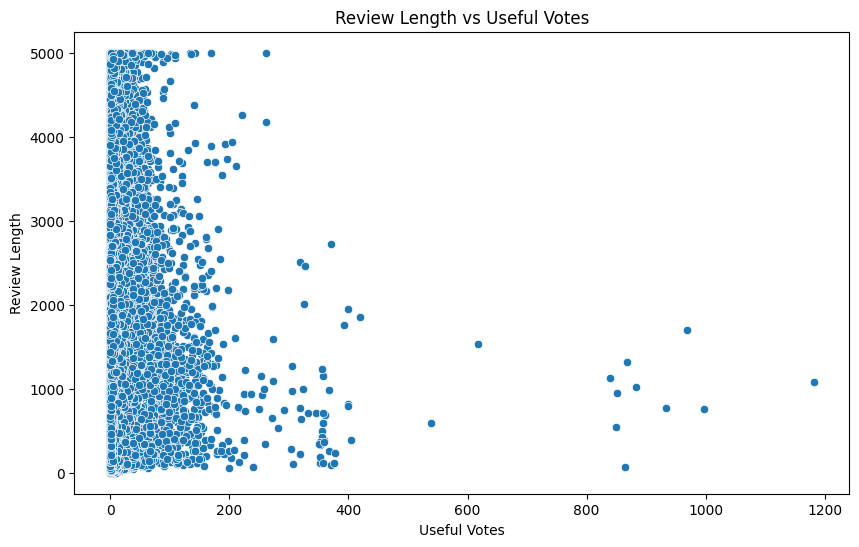

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='useful_review', y='review_length', data=merged_df)
plt.title('Review Length vs Useful Votes')
plt.xlabel('Useful Votes')
plt.ylabel('Review Length')
plt.show()

Most of the reviews recorded here have little to no useful votes. However, even only considering the points with higher numbers of useful votes, it does not appear that more text means a more helpful review. To get a clearer view of how certain review and user features correlate with each other, we create a scatterplot:

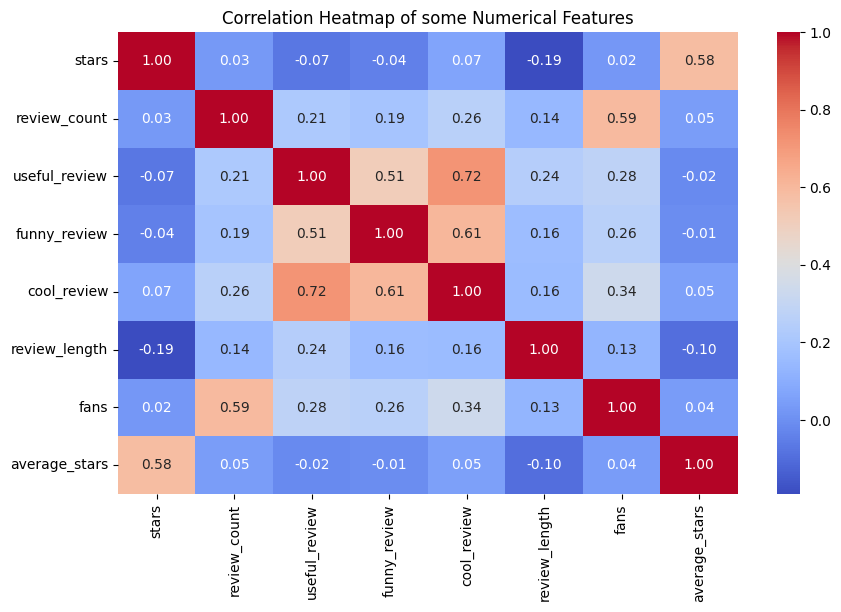

In [27]:
plt.figure(figsize=(10, 6)) #see AI appendix
sns.heatmap(merged_df[['stars', 'review_count', 'useful_review', 'funny_review', 'cool_review','review_length','fans','average_stars']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of some Numerical Features')
plt.show()

As mentioned above, negative reviews tend to be a little bit longer. Reviewers with fans tend to have a higher review count. And if users are voting for a review as funny, useful, or cool, the other categories also tend to have higher votes for that review.

Key findings from the EDA that inform our analysis:
- Longer reviews are not necessarily seen as more useful.
    - When working on the final steps of presenting a relevant review to a specific user, this needs to be considered.
- Negative reviews tend to be longer, though **there is significant variance in review length.**
    - This suggests that a Bag of Words approach may not be the most effective, as our dataset might be susceptible to frequency bias.
    
With this in mind, we shift to the applied methods.